# Deep Learning to detect numbers

## Libraries

In [37]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from nn import transform

In [41]:
batch_size = 16
n_epochs = 3
lr = 0.001

## Dataset

In [20]:
# Download and load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Download and load the test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = tuple(range(10))

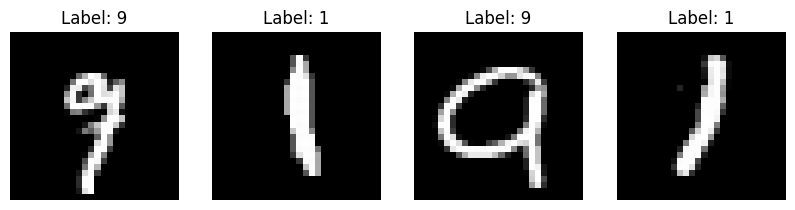

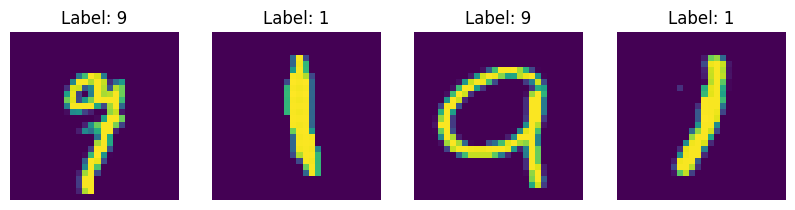

In [40]:
def imshow(imgs, labels):
    #imgs = imgs / 2 + 0.5  # unnormalize
    npimgs = imgs.numpy()
    fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))
    for i in range(4):
        ax = axs[i]
        ax.imshow(np.transpose(npimgs[i], (1, 2, 0)), cmap='gray')
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

    imgs = imgs / 2 + 0.5  # unnormalize
    npimgs = imgs.numpy()
    fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))
    for i in range(4):
        ax = axs[i]
        ax.imshow(np.transpose(npimgs[i], (1, 2, 0)))
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use the built-in next() function

# Show images with titles
imshow(images, labels)

In [28]:
# size of the images
print(images[0].shape)

torch.Size([1, 28, 28])


In [29]:
# total number of images
print(len(trainset))

60000


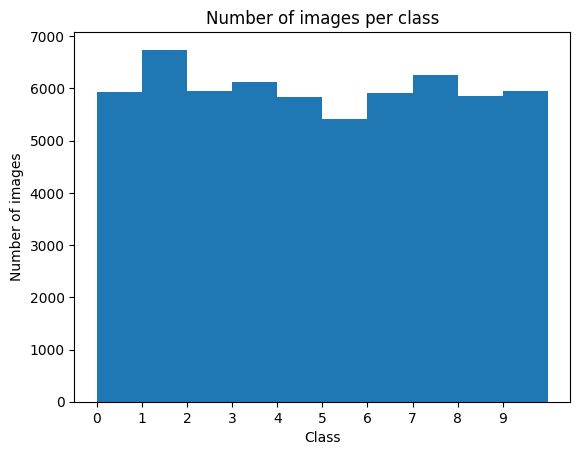

In [17]:
# plot histogram of the number of images per class
labels = np.array(trainset.targets)
plt.hist(labels, bins=range(11))
plt.xticks(range(10))
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.show()

## Neural Network

In [42]:
from nn import Net

net = Net()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# Train the network

for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        optimizer.zero_grad()


        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
    # print loss 
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, loss: 0.7153130457120637
Epoch 2, loss: 0.10160230458929824
Epoch 3, loss: 0.07055154416579754
Finished Training


## Inference

In [44]:
def imshow(imgs, labels, preds):
    imgs = imgs / 2 + 0.5  # unnormalize
    npimgs = imgs.numpy()
    batch_size = len(imgs)
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    for i in range(batch_size):
        ax = axs[i // 4, i % 4]
        ax.imshow(np.transpose(npimgs[i], (1, 2, 0)), cmap='gray')
        ax.set_title(f'Label: {labels[i]}\nPred: {preds[i]}')
        ax.axis('off')
    plt.show()

net.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

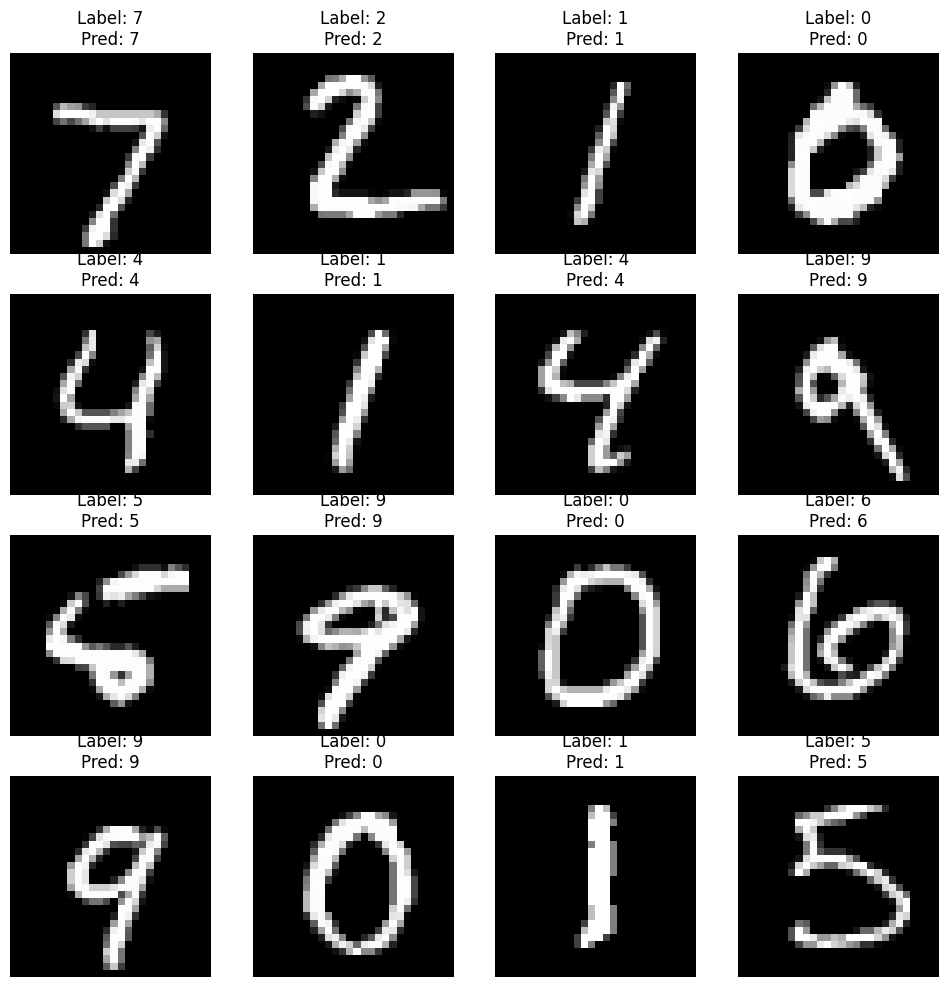

In [45]:
# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Run inference
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Show images with actual and predicted labels
imshow(images, labels, predicted)

### Accuracy

In [46]:
correct = 0
total = 0
with torch.no_grad():  # We don't need gradients for evaluation
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

Accuracy of the network on the 10000 test images: 98.23%


In [47]:
# Save the model
torch.save(net.state_dict(), 'mnist_netV2.pth')